In [ ]:
#!pip install arch

# **Part 1: Selecting a Financial Time Series Dataset**

For our second project that relates to financial risks, we chose CrowdStrike due to its critical role in cybersecurity and global market impact. A key reason for our selection is the July 2024 IT outage, caused by a faulty software update, which disrupted major industries worldwide and raised concerns about cybersecurity risk management. Using Yahoo Finance as our primary data source, our analysis will focus on financial performance, volatility trends, and risk assessment to evaluate the company's resilience and ability to recover from such crises.

In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller
import scipy.stats as stats
from scipy.stats import t
from scipy.stats import skew, kurtosis, normaltest, norm




In [53]:
df = pd.read_csv("data/ENRICH/merged_stock_income.csv", index_col="Date", parse_dates=["Date"])

df.head()

,Ticker,SimFinId,Open,High,Low,Close,Adj. Close,Volume,Shares Outstanding,Currency,...,Net Income (Common),Price Change %,Target,Weekday,Month,Quarter,Daily_Return,MA_5,MA_10,Log_Returns
Date,,,,,,,,,,,,,,,,,,,,,
2019-04-25,A,45846,75.26,77.04,74.94,76.72,73.68,1481436,317515869.0,USD,...,1071000000,0.000000,0,Thursday,4,2,NaN,73.680000,73.680000,NaN
2019-04-25,EPRT,949674,19.89,20.09,19.70,19.98,15.44,300526,57825460.0,USD,...,95725000,-79.044517,0,Thursday,4,2,-79.044517,44.560000,44.560000,-1.562770
2019-04-25,EPRT,949674,19.89,20.09,19.70,19.98,15.44,300526,57825460.0,USD,...,42273000,0.000000,0,Thursday,4,2,0.000000,34.853333,34.853333,0.000000
2019-04-25,EPRT,949674,19.89,20.09,19.70,19.98,15.44,300526,57825460.0,USD,...,41844000,0.000000,0,Thursday,4,2,0.000000,30.000000,30.000000,0.000000
2019-04-25,EPM,516432,6.74,6.97,6.74,6.93,4.64,92890,33186665.0,USD,...,35217000,-69.948187,0,Thursday,4,2,-69.948187,24.928000,24.928000,-1.202247


In [54]:
df.columns

Index(['Ticker', 'SimFinId', 'Open', 'High', 'Low', 'Close', 'Adj. Close',
       'Volume', 'Shares Outstanding', 'Currency', 'Fiscal Year',
       'Fiscal Period', 'Publish Date', 'Restated Date', 'Shares (Basic)',
       'Shares (Diluted)', 'Revenue', 'Cost of Revenue', 'Gross Profit',
       'Operating Expenses', 'Selling, General & Administrative',
       'Operating Income (Loss)', 'Non-Operating Income (Loss)',
       'Interest Expense, Net', 'Pretax Income (Loss), Adj.',
       'Abnormal Gains (Losses)', 'Pretax Income (Loss)',
       'Income Tax (Expense) Benefit, Net',
       'Income (Loss) from Continuing Operations', 'Net Income',
       'Net Income (Common)', 'Price Change %', 'Target', 'Weekday', 'Month',
       'Quarter', 'Daily_Return', 'MA_5', 'MA_10', 'Log_Returns'],
      dtype='object')

Fetch Historical Data:



In [66]:
# Fetch the data
def fetch_ticker_data(ticker, start_date, end_date):
    ticker = ticker
    start_date = start_date
    end_date = end_date
    ticker_data = df[(df['Ticker'] == ticker) & 
                 (df.index >= start_date) & 
                 (df.index <= end_date)]
    return ticker_data
    
    
ticker_data= fetch_ticker_data('PG','2020-03-15','2025-03-15')

# **PART 2 : EDA **

Plot the Raw Time Series:



In [67]:
ticker_data['Ticker'].unique()[0]

'PG'

In [68]:
ticker_data.columns

Index(['Ticker', 'SimFinId', 'Open', 'High', 'Low', 'Close', 'Adj. Close',
       'Volume', 'Shares Outstanding', 'Currency', 'Fiscal Year',
       'Fiscal Period', 'Publish Date', 'Restated Date', 'Shares (Basic)',
       'Shares (Diluted)', 'Revenue', 'Cost of Revenue', 'Gross Profit',
       'Operating Expenses', 'Selling, General & Administrative',
       'Operating Income (Loss)', 'Non-Operating Income (Loss)',
       'Interest Expense, Net', 'Pretax Income (Loss), Adj.',
       'Abnormal Gains (Losses)', 'Pretax Income (Loss)',
       'Income Tax (Expense) Benefit, Net',
       'Income (Loss) from Continuing Operations', 'Net Income',
       'Net Income (Common)', 'Price Change %', 'Target', 'Weekday', 'Month',
       'Quarter', 'Daily_Return', 'MA_5', 'MA_10', 'Log_Returns'],
      dtype='object')

In [69]:
ticker_data.shape

(5085, 40)

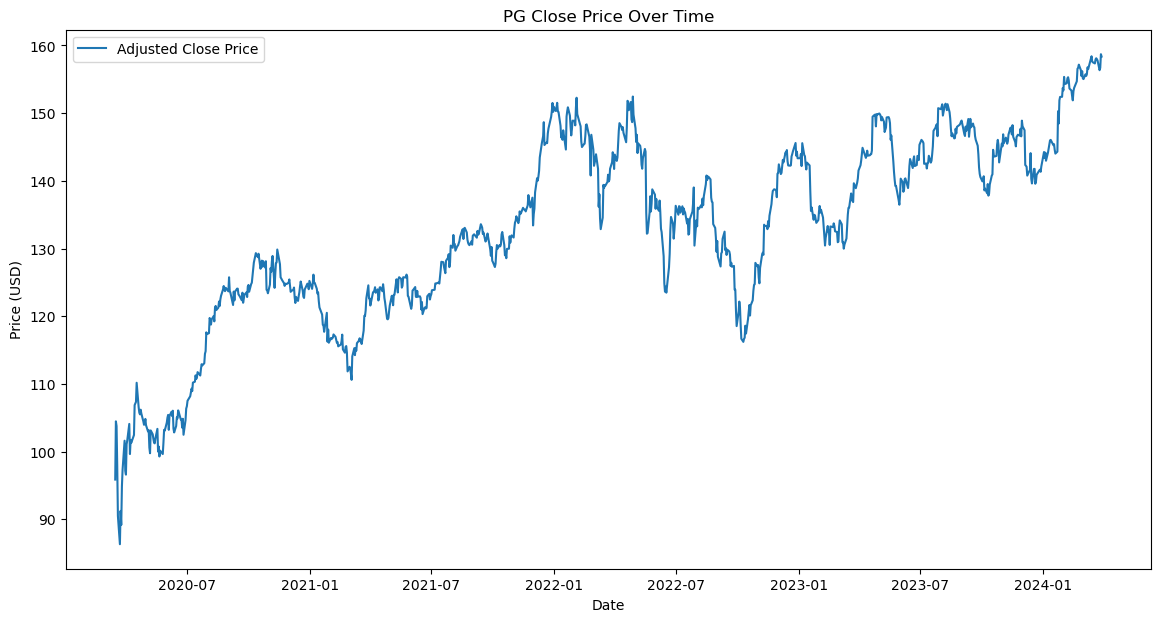

In [74]:
def plot_raw_time_series(ticker_df):
    plt.figure(figsize=(14, 7))
    plt.plot(ticker_df['Adj. Close'], label='Adjusted Close Price')
    plt.title(f'{ticker_df['Ticker'].unique()[0]} Close Price Over Time')
    plt.xlabel('Date')
    plt.ylabel('Price (USD)')
    plt.legend()
    return plt.show()

plot_raw_time_series(ticker_data)

Compute and Analyze Log-Returns:



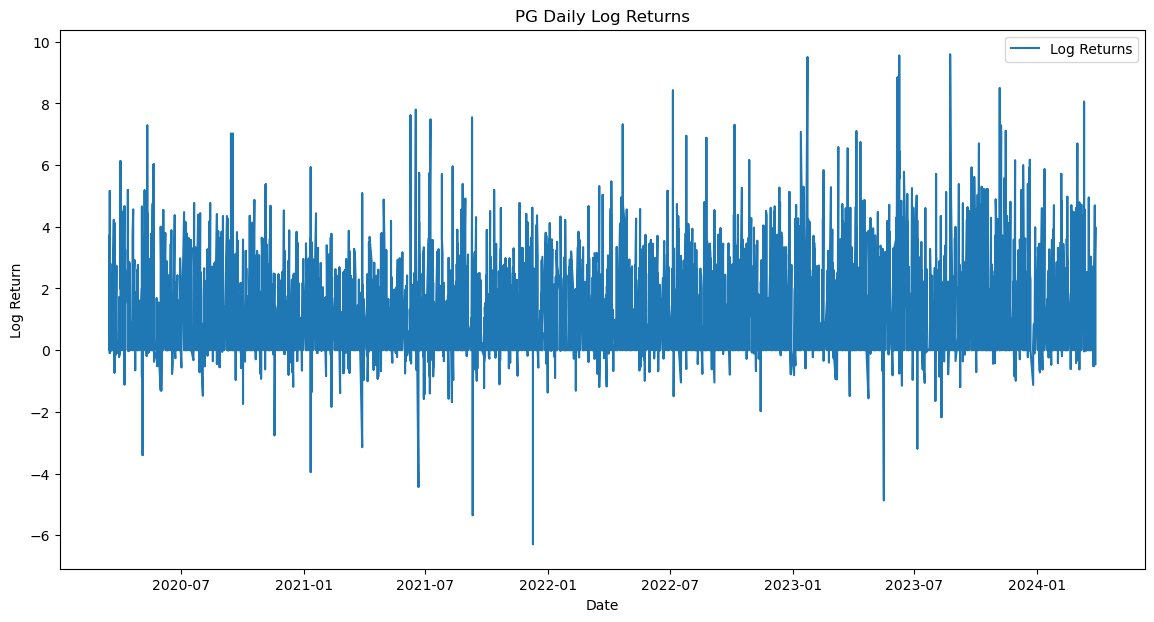

In [71]:
# Drop the NaN values resulting from the shift operation
log_returns = ticker_data['Log_Returns'].dropna()


# Plot log-returns
plt.figure(figsize=(14, 7))
plt.plot(log_returns, label='Log Returns')
plt.title(f'{ticker_data['Ticker'].unique()[0]} Daily Log Returns')
plt.xlabel('Date')
plt.ylabel('Log Return')
plt.legend()
plt.show()

Summary Statistics and Stationarity Test:



In [75]:
# Summary statistics
summary_stats = log_returns.describe()
print("Summary Statistics:\n", summary_stats)



Summary Statistics:
 count    5085.000000
mean             inf
std              NaN
min        -6.292488
25%         0.000000
50%         0.000000
75%         1.831331
max              inf
Name: Log_Returns, dtype: float64


Checking for stationarity using the Augmented Dickey-Fuller (ADF) test.


In [63]:
# Perform ADF test
adf_result = adfuller(log_returns)
print(f'ADF Statistic: {adf_result[0]}')
print(f'p-value: {adf_result[1]}')

MissingDataError: exog contains inf or nans

A lower (more negative) ADF statistic provides stronger evidence against the null hypothesis (H0: the series is non-stationary).

Autocorrelation and Partial Autocorrelation:



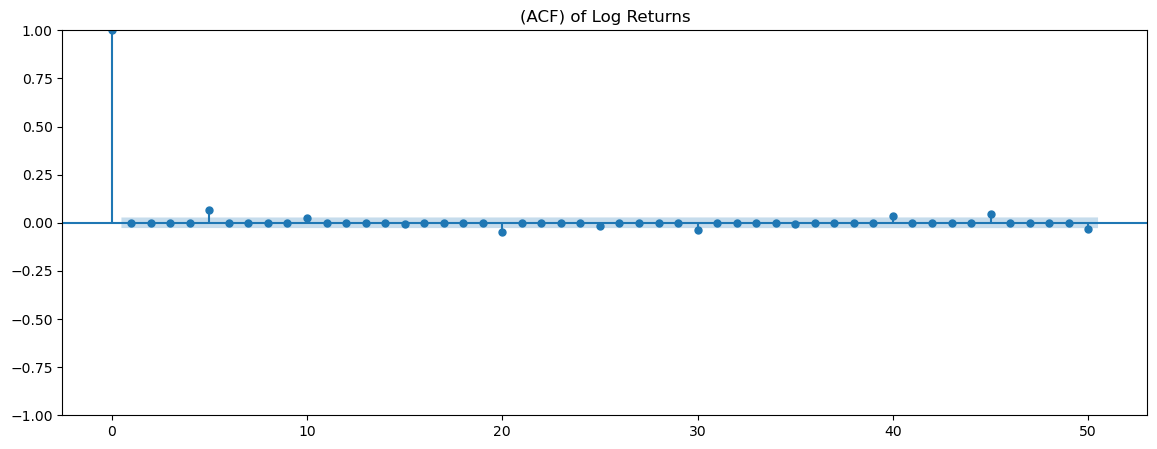

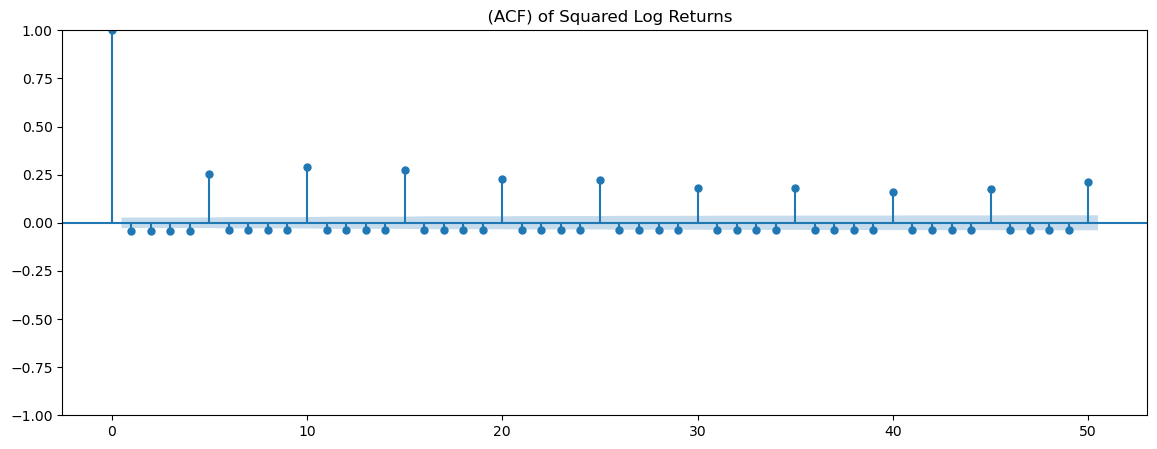

In [42]:
# Plot ACF
plt.figure(figsize=(14, 5))
plot_acf(log_returns, lags=50, ax=plt.gca())
plt.title('(ACF) of Log Returns')
plt.show()

# Compute squared log returns
squared_log_returns = log_returns**2

# Plot ACF of squared log returns
plt.figure(figsize=(14, 5))
plot_acf(squared_log_returns, lags=50, ax=plt.gca())
plt.title('  (ACF) of Squared Log Returns')
plt.show()


# **Part 3: Volatility Modeling**

**FITTING A T-DISTRIBUTION**

Fitted t-distribution parameters:
Degrees of Freedom: 2.1220
Location: -0.0000
Scale: 0.0000
Variance: 0.0000
Kurtosis: Infinite


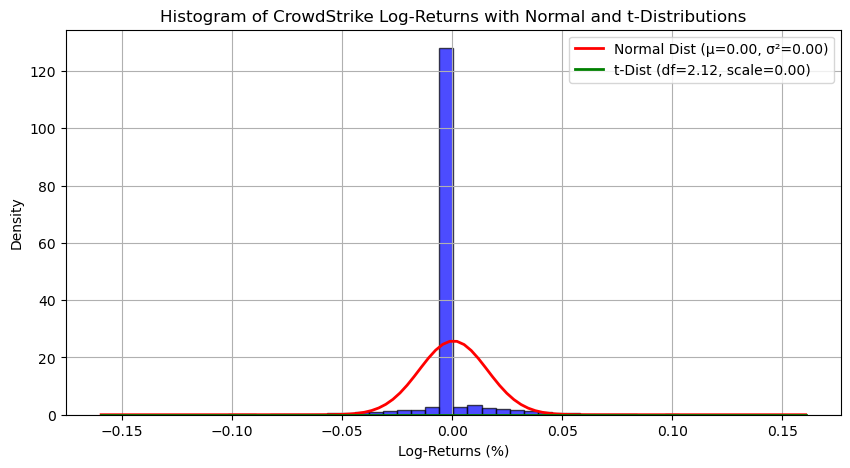

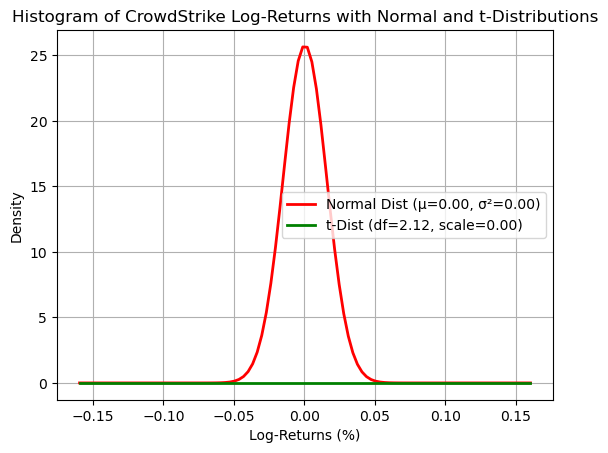

In [44]:
# Fit a t-distribution to the log-returns
params = t.fit(log_returns)  # Direct fitting

# Extract fitted parameters
df_t, loc_t, scale_t = params

# Compute variance and kurtosis of the fitted t-distribution
variance_t = (df_t / (df_t - 2)) * (scale_t ** 2) if df_t > 2 else np.nan
kurtosis_t = (6 / (df_t - 4)) if df_t > 4 else np.inf  # Infinite for df <= 4

# Print fitted parameters and statistics
print(f"Fitted t-distribution parameters:")
print(f"Degrees of Freedom: {df_t:.4f}")
print(f"Location: {loc_t:.4f}")
print(f"Scale: {scale_t:.4f}")
print(f"Variance: {variance_t:.4f}")
print(f"Kurtosis: {'Infinite' if np.isinf(kurtosis_t) else f'{kurtosis_t:.4f}'}")

# Fit a t-distribution to the log-returns
params = t.fit(log_returns)  # Direct fitting

# Extract fitted parameters
df_t, loc_t, scale_t = params

# Compute variance and kurtosis of the fitted t-distribution
variance_t = (df_t / (df_t - 2)) * (scale_t ** 2) if df_t > 2 else np.nan
kurtosis_t = (6 / (df_t - 4)) if df_t > 4 else np.inf  # Infinite for df <= 4


# Plot histogram with normal and t-distribution curves
plt.figure(figsize=(10, 5))
count, bins, _ = plt.hist(log_returns, bins=50, alpha=0.7, color='blue', edgecolor='black', density=True)

# Compute normal and t-distribution curves
x = np.linspace(bins[0], bins[-1], 100)
pdf_norm = norm.pdf(x, np.mean(log_returns), np.std(log_returns))
pdf_t = t.pdf(x, df_t, loc=loc_t, scale=scale_t)

plt.plot(x, pdf_norm, color='red', lw=2, label=f'Normal Dist (μ={np.mean(log_returns):.2f}, σ²={np.var(log_returns):.2f})')
plt.plot(x, pdf_t, color='green', lw=2, label=f't-Dist (df={df_t:.2f}, scale={scale_t:.2f})')

plt.xlabel("Log-Returns (%)")
plt.ylabel("Density")
plt.title("Histogram of CrowdStrike Log-Returns with Normal and t-Distributions")
plt.legend()
plt.grid()
plt.show()
x = np.linspace(bins[0], bins[-1], 100)
pdf_norm = norm.pdf(x, np.mean(log_returns), np.std(log_returns))
pdf_t = t.pdf(x, df_t, loc=loc_t, scale=scale_t)

plt.plot(x, pdf_norm, color='red', lw=2, label=f'Normal Dist (μ={np.mean(log_returns):.2f}, σ²={np.var(log_returns):.2f})')
plt.plot(x, pdf_t, color='green', lw=2, label=f't-Dist (df={df_t:.2f}, scale={scale_t:.2f})')

plt.xlabel("Log-Returns (%)")
plt.ylabel("Density")
plt.title("Histogram of CrowdStrike Log-Returns with Normal and t-Distributions")
plt.legend()
plt.grid()
plt.show()


The t-distribution provides better tail estimates, making it more suitable for financial risk modeling (e.g., Value at Risk (VaR) and stress testing

**FITTING A GARCH MODEL**



In [45]:
from arch import arch_model


In [46]:
returns = log_returns.dropna()


models = {
    'GARCH(1,1)': arch_model(returns, mean='AR', lags=1, vol='Garch', p=1,o=1, q=1, dist='t').fit(disp='off'),
    'GARCH(2,1)': arch_model(returns, mean='AR', lags=1, vol='Garch', p=2,o=1, q=1, dist='t').fit(disp='off'),
    'GARCH(1,2)': arch_model(returns, mean='AR', lags=1, vol='Garch', p=1, o=1,q=2, dist='t').fit(disp='off'),
    'GARCH(2,2)': arch_model(returns, mean='AR', lags=1, vol='Garch', p=2,o=1, q=2, dist='t').fit(disp='off'),
}

# Compare AIC and BIC values
for name, model in models.items():
    print(f"{name}: AIC = {model.aic:.2f}, BIC = {model.bic:.2f}")

GARCH(1,1): AIC = -31657.86, BIC = -31612.12
GARCH(2,1): AIC = -31664.00, BIC = -31611.73
GARCH(1,2): AIC = -31618.80, BIC = -31566.53
GARCH(2,2): AIC = -31618.33, BIC = -31559.52


c:\Users\bburg\anaconda3\Lib\site-packages\arch\univariate\base.py:309: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0002397. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
c:\Users\bburg\anaconda3\Lib\site-packages\arch\univariate\base.py:768: ConvergenceWarning: The optimizer returned code 4. The message is:
Inequality constraints incompatible
See scipy.optimize.fmin_slsqp for code meaning.

  warnings.warn(
c:\Users\bburg\anaconda3\Lib\site-packages\arch\univariate\base.py:309: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0002397. Parameter
estimation work better when this value is between 1 and 1000. Th

In [47]:
# Find the model with the lowest AIC and BIC
best_model_aic = min(models, key=lambda x: models[x].aic)
best_model_bic = min(models, key=lambda x: models[x].bic)

# Extract the corresponding AIC and BIC values
lowest_aic = models[best_model_aic].aic
lowest_bic = models[best_model_bic].bic

# Print results
print(f"Best model based on AIC: {best_model_aic} with AIC = {lowest_aic:.2f}")
print(f"Best model based on BIC: {best_model_bic} with BIC = {lowest_bic:.2f}")

Best model based on AIC: GARCH(2,1) with AIC = -31664.00
Best model based on BIC: GARCH(1,1) with BIC = -31612.12


To account for this asymmetry in volatility, we have implemented the GJR-GARCH model and we used best model based on lowest BIC

c:\Users\bburg\anaconda3\Lib\site-packages\arch\univariate\base.py:309: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0002397. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
c:\Users\bburg\anaconda3\Lib\site-packages\arch\univariate\base.py:768: ConvergenceWarning: The optimizer returned code 4. The message is:
Inequality constraints incompatible
See scipy.optimize.fmin_slsqp for code meaning.

  warnings.warn(



Model Summary:
                            AR - GJR-GARCH Model Results                            
Dep. Variable:                  Log Returns   R-squared:                       0.000
Mean Model:                              AR   Adj. R-squared:                 -0.000
Vol Model:                        GJR-GARCH   Log-Likelihood:                15835.9
Distribution:      Standardized Student's t   AIC:                          -31657.9
Method:                  Maximum Likelihood   BIC:                          -31612.1
                                              No. Observations:                 5083
Date:                      Mon, Mar 24 2025   Df Residuals:                     5081
Time:                              01:53:52   Df Model:                            2
                                    Mean Model                                   
                     coef    std err          t      P>|t|       95.0% Conf. Int.
-------------------------------------------------------

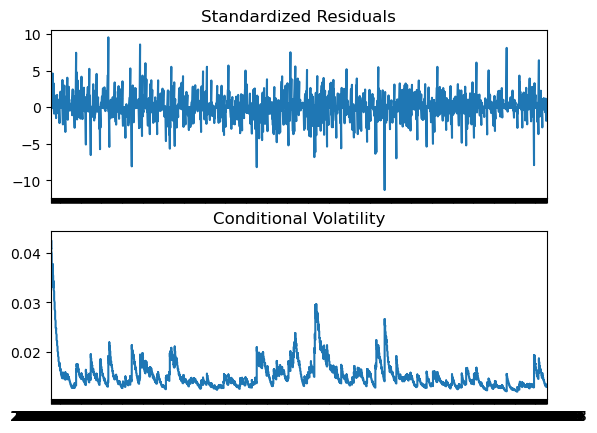

In [48]:
from arch import arch_model

from statsmodels.tsa.arima.model import ARIMA

# Prepare the data
returns = log_returns.dropna()

# Fit GARCH(1,1) model with t-distributed errors
garch_model = arch_model(returns, mean = 'AR', lags= 1, vol='Garch', p=1, o=1, q=1, dist='t')
garch_fit = garch_model.fit(disp='off')
print("\nModel Summary:")
print(garch_fit.summary())

# Plot GJR-GARCH model results
fig = garch_fit.plot()
plt.show()

**# VISUALIZING VOLATILITY**

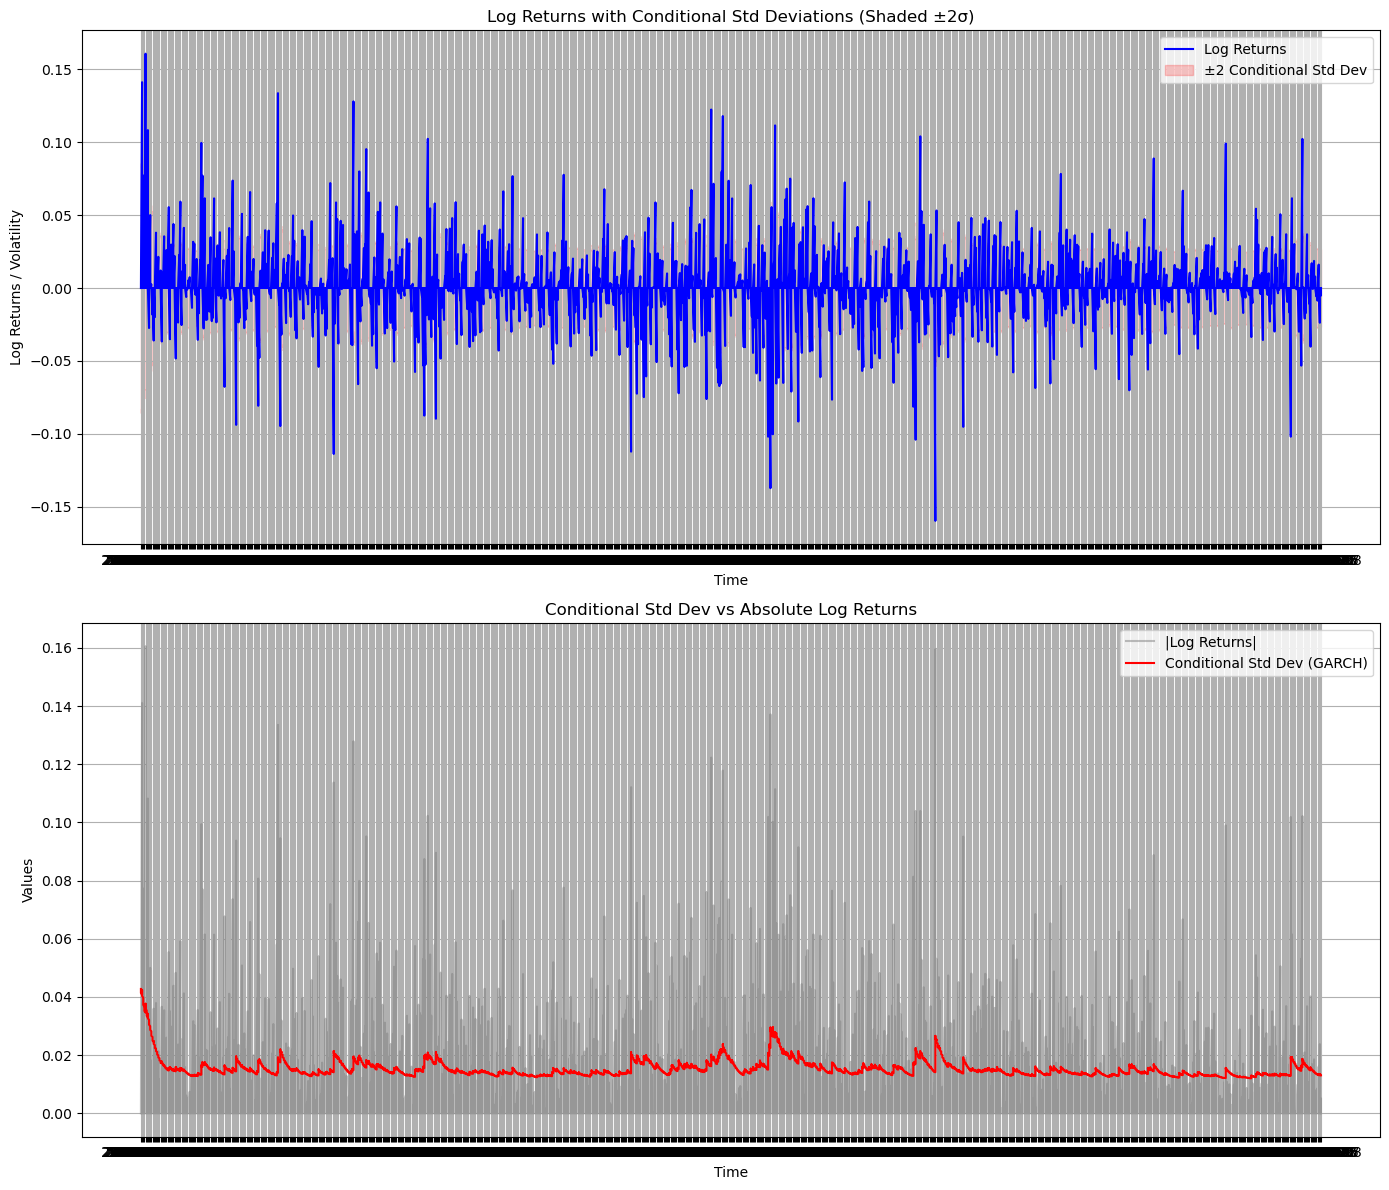

In [49]:
import matplotlib.pyplot as plt
import numpy as np

# Ensure that log returns and conditional volatility are available
conditional_volatility = garch_fit.conditional_volatility  # GARCH(1,1) fitted volatility
absolute_log_returns = np.abs(log_returns)  # Absolute log-returns

# Create a figure with two stacked subplots
fig, axs = plt.subplots(2, 1, figsize=(14, 12))

# --- Plot 1: Log Returns with Conditional Volatility Bands ---
axs[0].plot(log_returns, label='Log Returns', color='blue')
upper_bound = 2 * conditional_volatility
lower_bound = -2 * conditional_volatility
axs[0].fill_between(log_returns.index, lower_bound, upper_bound, color='red', alpha=0.2, label='±2 Conditional Std Dev')

axs[0].set_title('Log Returns with Conditional Std Deviations (Shaded ±2σ)')
axs[0].set_xlabel('Time')
axs[0].set_ylabel('Log Returns / Volatility')
axs[0].legend()
axs[0].grid(True)

# --- Plot 2: Conditional Std Dev vs. Absolute Log Returns ---
axs[1].plot(absolute_log_returns, label='|Log Returns|', color='gray', alpha=0.5)
axs[1].plot(conditional_volatility, label='Conditional Std Dev (GARCH)', color='red')

axs[1].set_title('Conditional Std Dev vs Absolute Log Returns')
axs[1].set_xlabel('Time')
axs[1].set_ylabel('Values')
axs[1].legend()
axs[1].grid(True)

# Adjust layout and display the figure
plt.tight_layout()
plt.show()


**Volatility Clustering**

The blue line (log-returns) exhibits clear periods of high volatility followed by high volatility, and low volatility followed by low volatility.
This confirms the volatility clustering effect, which is well captured by the GARCH model.

**Conditional Volatility Bands **

The red shaded area represents +/- 2 times the conditional standard deviation
When the log-returns move outside these bands, it suggests extreme market moves.

**Risk Events**

Significant spikes in volatility (blue line breaking out of the red bands) correspond to major market events (e.g., earnings reports, economic news, or the July 2024 IT outage crisis).


Thefore, GARCH model effectively capture volatility forecasts dynamically, reacting to market shocks.

**RESIDUAL ANALYSIS**


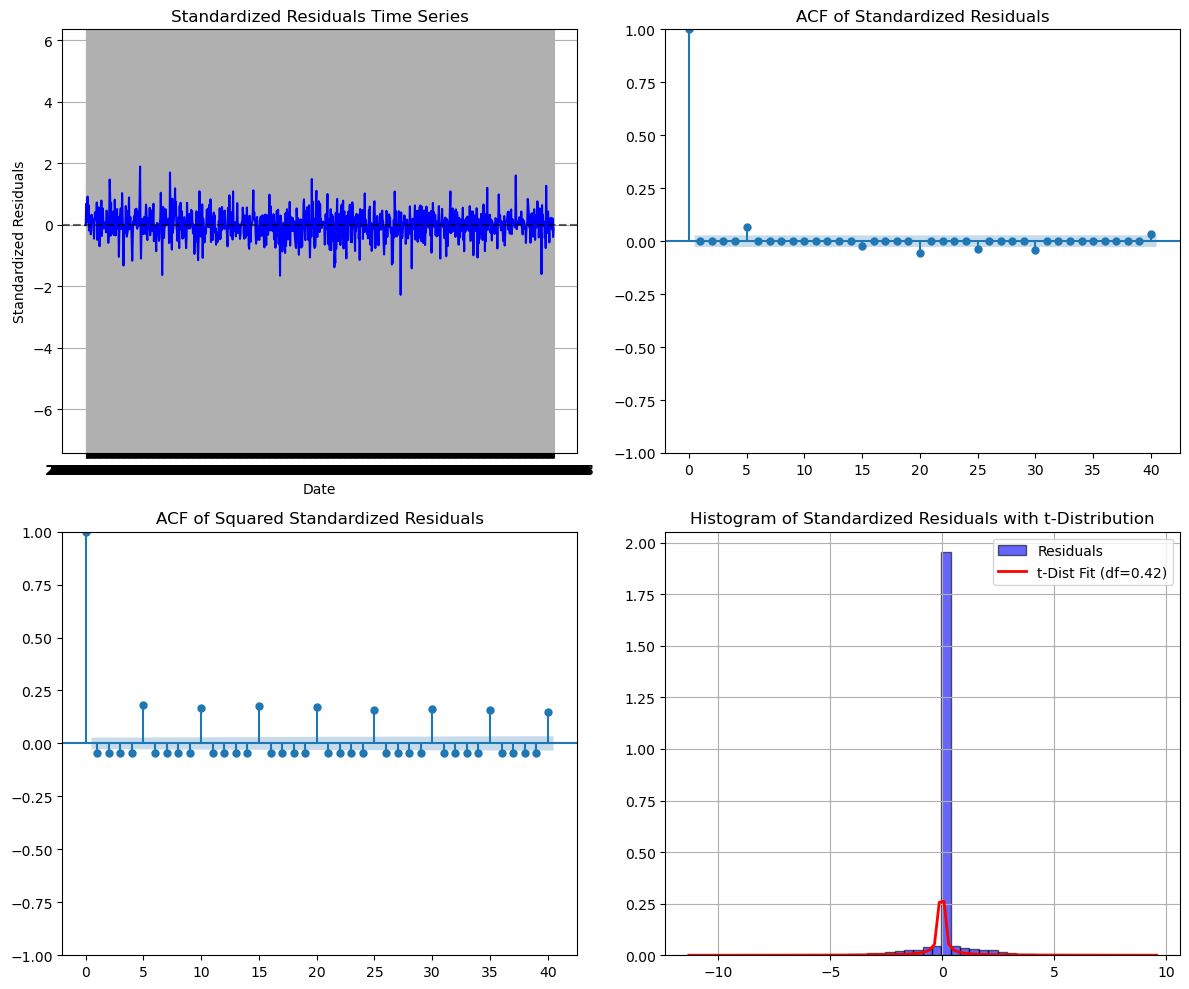

In [50]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf
from scipy.stats import t

# Ensure GARCH model is fitted
conditional_volatility = garch_fit.conditional_volatility  # Conditional standard deviation from GARCH
std_residuals = garch_fit.resid / conditional_volatility  # Compute standardized residuals
std_residuals = std_residuals.dropna()  # Drop NaNs

# Set up a 2x2 subplot for residual analysis
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# --- 1. Standardized Residuals Time Series ---
sns.lineplot(x=std_residuals.index, y=std_residuals, ax=axes[0, 0], color='blue')
axes[0, 0].set_title("Standardized Residuals Time Series")
axes[0, 0].set_ylabel("Standardized Residuals")
axes[0, 0].axhline(y=0, color='black', linestyle='--', alpha=0.6)
axes[0, 0].grid(True)

# --- 2. ACF of Standardized Residuals ---
plot_acf(std_residuals, ax=axes[0, 1], lags=40)
axes[0, 1].set_title("ACF of Standardized Residuals")

# --- 3. ACF of Squared Standardized Residuals ---
plot_acf(std_residuals**2, ax=axes[1, 0], lags=40)
axes[1, 0].set_title("ACF of Squared Standardized Residuals")

# --- 4. Histogram with t-Distribution Fit ---
# Fit a t-distribution to the residuals
df_t, loc_t, scale_t = t.fit(std_residuals)
x = np.linspace(min(std_residuals), max(std_residuals), 100)
pdf_t = t.pdf(x, df_t, loc=loc_t, scale=scale_t)

# Plot histogram of standardized residuals
axes[1, 1].hist(std_residuals, bins=50, density=True, alpha=0.6, color='blue', edgecolor='black', label="Residuals")
axes[1, 1].plot(x, pdf_t, color='red', lw=2, label=f't-Dist Fit (df={df_t:.2f})')
axes[1, 1].set_title("Histogram of Standardized Residuals with t-Distribution")
axes[1, 1].legend()
axes[1, 1].grid(True)

# Adjust layout and display plots
plt.tight_layout()
plt.show()


# **Part 4 : Risk Modeling**

# **VaR**

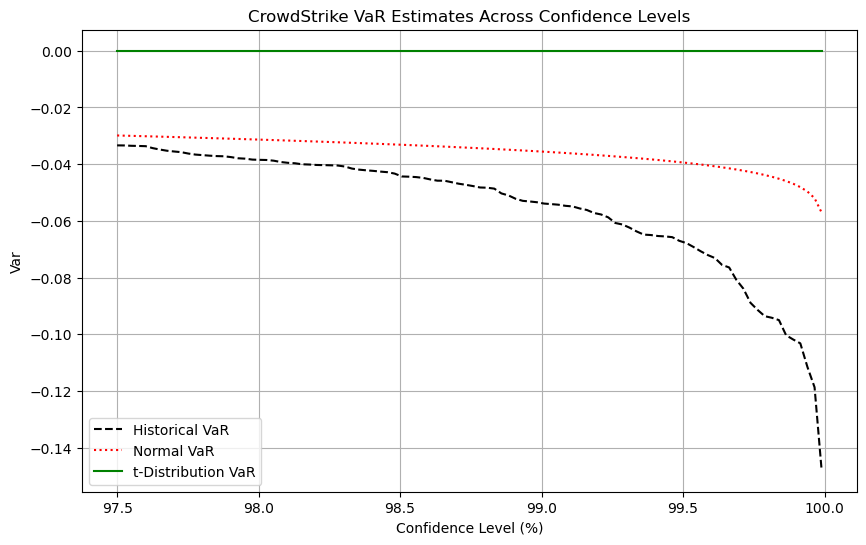

In [51]:
# Define confidence levels for VaR estimation
confidence_levels = np.linspace(0.975, 0.9999, 100)

# Compute Historical VaR (Percentile-based)
VaR_hist = [np.percentile(returns, (1 - alpha) * 100) for alpha in confidence_levels]

# Compute Normal VaR (Assuming normal distribution of returns)
VaR_norm = [norm.ppf(1 - alpha, loc=np.mean(returns), scale=np.std(returns)) for alpha in confidence_levels]

# Fit a t-distribution to returns and compute VaR based on the t-distribution
df_t, loc_t, scale_t = t.fit(returns)
VaR_t = [loc_t + scale_t * t.ppf(1 - alpha, df_t) for alpha in confidence_levels]

# Plot VaR estimates across confidence levels
plt.figure(figsize=(10, 6))
plt.plot(confidence_levels * 100, VaR_hist, label='Historical VaR', linestyle='dashed', color='black')
plt.plot(confidence_levels * 100, VaR_norm, label='Normal VaR', linestyle='dotted', color='red')
plt.plot(confidence_levels * 100, VaR_t, label='t-Distribution VaR', linestyle='solid', color='green')

plt.xlabel("Confidence Level (%)")
plt.ylabel("Var")
plt.title("CrowdStrike VaR Estimates Across Confidence Levels")
plt.legend()
plt.grid()
plt.show()

log-returns with  normal distribution underestimates risk in extreme market conditions, as financial data often has fat tails (large fluctuations).while log-returns with  t-Distribution Captures fat-tailed behavior, making it more accurate for financial risk modeling.

# **Risk Management **

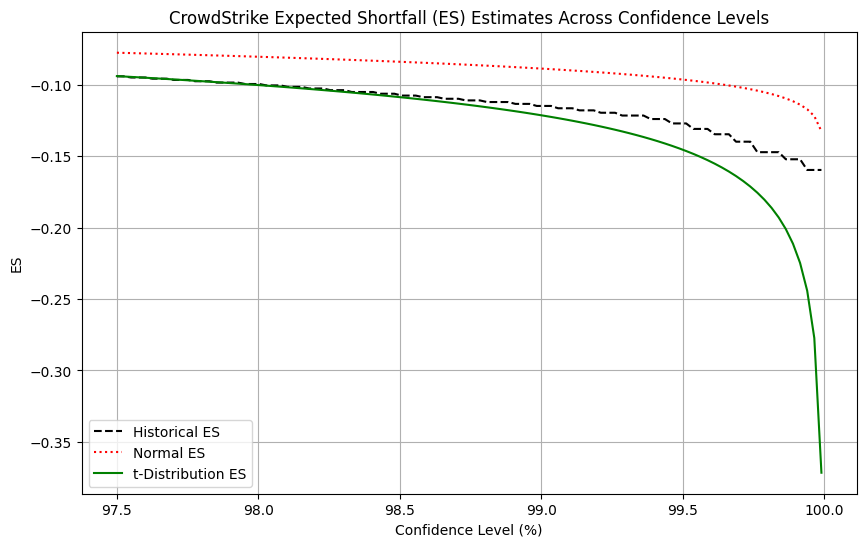

In [32]:
# Compute Expected Shortfall (ES) using different methods
mean_return, std_return = returns.mean(), returns.std()

# Compute Normal ES
phi_norm = norm.pdf(norm.ppf(confidence_levels))
ES_norm = mean_return - std_return * (phi_norm / (1 - confidence_levels))

# Compute t-Distribution Expected Shortfall (ES)
t_alpha = t.ppf(confidence_levels, df_t)
t_pdf_alpha = t.pdf(t_alpha, df_t)
ES_t = loc_t - scale_t * (t_pdf_alpha / (1 - confidence_levels)) * (df_t + t_alpha**2) / (df_t - 1)

# Compute Historical Expected Shortfall (ES) directly from data
ES_hist = [returns[returns <= VaR_hist[i]].mean() for i in range(len(confidence_levels))]

# Plot Expected Shortfall (ES) estimates across confidence levels
plt.figure(figsize=(10, 6))
plt.plot(confidence_levels * 100, ES_hist, label='Historical ES', linestyle='dashed', color='black')
plt.plot(confidence_levels * 100, ES_norm, label='Normal ES', linestyle='dotted', color='red')
plt.plot(confidence_levels * 100, ES_t, label='t-Distribution ES', linestyle='solid', color='green')

plt.xlabel("Confidence Level (%)")
plt.ylabel("ES")
plt.title("CrowdStrike Expected Shortfall (ES) Estimates Across Confidence Levels")
plt.legend()
plt.grid()
plt.show()


At high confidence levels , historical ES aligns closely with t-Distribution ES. While Normal ES consistently underestimates tail risk


**DYNAMIC RISK MODELING**



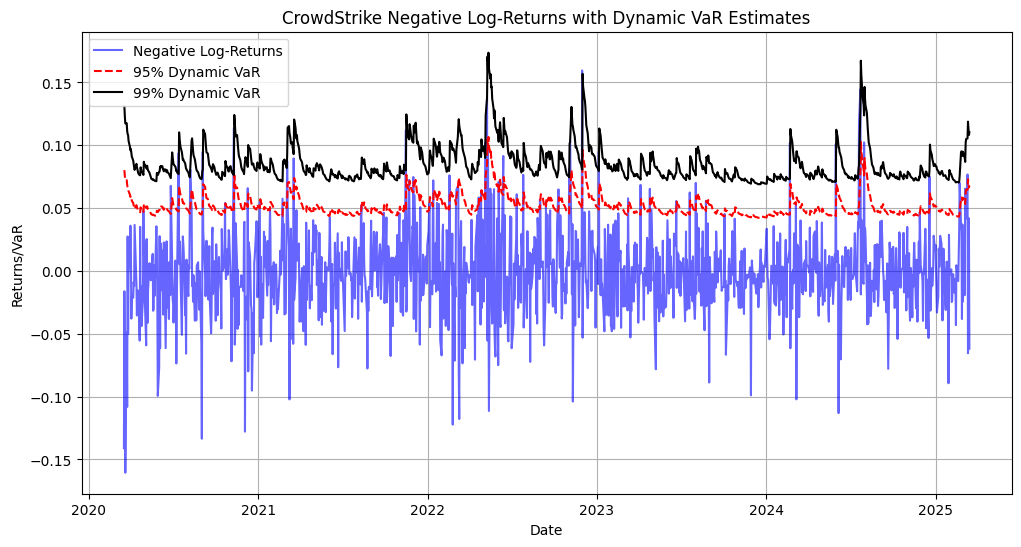

In [33]:
# Extract conditional volatility and standardized residuals
cond_volatility = garch_fit.conditional_volatility.dropna()
std_residuals = garch_fit.resid / cond_volatility
std_residuals = std_residuals.dropna()

# Fit a t-distribution to standardized residuals
df_t, loc_t, scale_t = t.fit(std_residuals)

# Compute dynamic VaR at 95% and 99% confidence levels
VaR_95 = -scale_t * t.ppf(0.05, df_t) * cond_volatility
VaR_99 = -scale_t * t.ppf(0.01, df_t) * cond_volatility

# Plot negative log-returns with dynamic VaR estimates
plt.figure(figsize=(12, 6))
plt.plot(-returns, label="Negative Log-Returns", color='blue', alpha=0.6)
plt.plot(VaR_95, label="95% Dynamic VaR", linestyle='dashed', color='red')
plt.plot(VaR_99, label="99% Dynamic VaR", linestyle='solid', color='black')

plt.xlabel("Date")
plt.ylabel("Returns/VaR")
plt.title("CrowdStrike Negative Log-Returns with Dynamic VaR Estimates")
plt.legend()
plt.grid()
plt.show()

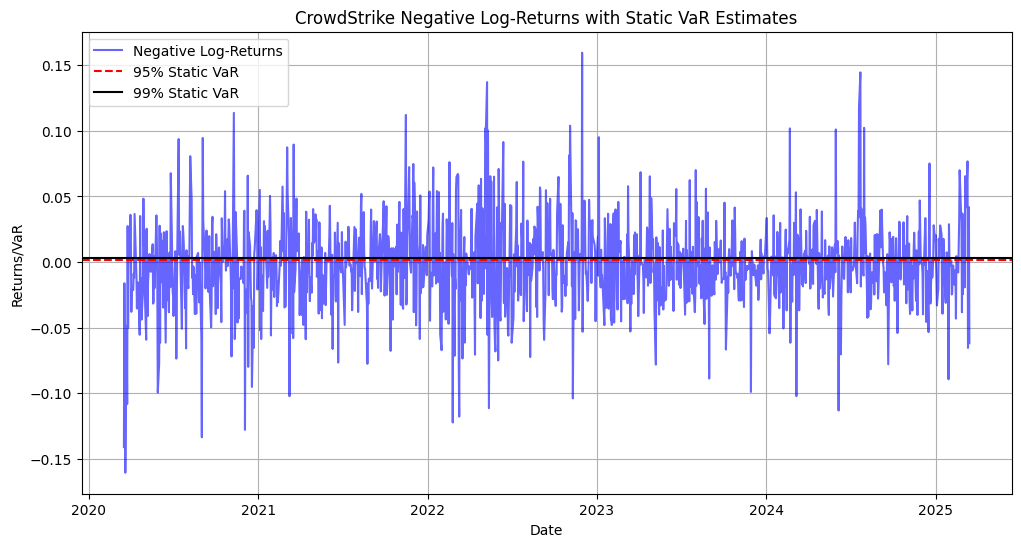

In [35]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import t

# Compute historical standard deviation (static volatility estimate)
historical_vol = np.std(returns)

# Fit a t-distribution to the returns
df_t, loc_t, scale_t = t.fit(returns)

# Compute **Static** VaR at 95% and 99% confidence levels
VaR_95_static = -scale_t * t.ppf(0.05, df_t) * historical_vol
VaR_99_static = -scale_t * t.ppf(0.01, df_t) * historical_vol

# Plot negative log-returns with **Static VaR Estimates**
plt.figure(figsize=(12, 6))
plt.plot(-returns, label="Negative Log-Returns", color='blue', alpha=0.6)

# Plot **Static VaR** as horizontal lines
plt.axhline(y=VaR_95_static, color='red', linestyle='dashed', label="95% Static VaR")
plt.axhline(y=VaR_99_static, color='black', linestyle='solid', label="99% Static VaR")

plt.xlabel("Date")
plt.ylabel("Returns/VaR")
plt.title("CrowdStrike Negative Log-Returns with Static VaR Estimates")
plt.legend()
plt.grid()
plt.show()


Static risk models tend to underestimate losses during periods of high volatility.
That's why GARCH-based Dynamic VaR are more suitable for looking at company returns







